# 4-Classification

In [1]:
#Général
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

#Validation
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("./df_scaled.csv",sep=";")
df

,Pclass,Sex,Age,Fare,Survived
0,0.825209,0.735342,-5.896199e-01,-0.500240,0.0
1,-1.572211,-1.359911,6.448480e-01,0.788947,1.0
2,0.825209,-1.359911,-2.810029e-01,-0.486650,1.0
3,-1.572211,-1.359911,4.133853e-01,0.422861,1.0
4,0.825209,0.735342,4.133853e-01,-0.484133,0.0
...,...,...,...,...,...
884,-0.373501,0.735342,-2.038487e-01,-0.384475,0.0
885,-1.572211,-1.359911,-8.210826e-01,-0.042213,0.0
886,0.825209,-1.359911,-5.482138e-16,-0.174084,0.0
887,-1.572211,0.735342,-2.810029e-01,-0.042213,1.0


In [3]:
df = df.loc[df['Survived']==df['Survived']]

In [4]:
def matrice_de_confusion(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)#, normalize = 'true')
    plt.figure(figsize = (6,4))
    sns.heatmap(conf_mat, annot=True, cmap="Blues")
    
    # Redéfinissez les étiquettes des axes x et y
    new_xticklabels = df["Survived"].unique()
    new_yticklabels = df["Survived"].unique()
    
    plt.xticks(range(len(new_xticklabels)), new_xticklabels)
    plt.yticks(range(len(new_yticklabels)), new_yticklabels)
    
    # Donnez un nom à chaque axe
    plt.xlabel("Classe Prédite")
    plt.ylabel("Classe Réelle")
    
    # Affichez la heatmap
    plt.show()

## 4-1 RandomForestClassifier classification

In [5]:
randomforest = RandomForestClassifier()
trained_randomforest = GridSearchCV(randomforest,{'n_estimators' : [100, 500], 'max_depth' : [None, 10]},cv=5,verbose=2)
trained_randomforest.fit(df.iloc[:,:-1],list(df.iloc[:,-1]))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=500; total time=   1.3s
[CV] END ...................max_depth=None, n_estimators=500; total time=   1.4s
[CV] END ...................max_depth=None, n_estimators=500; total time=   1.2s
[CV] END ...................max_depth=None, n_estimators=500; total time=   1.2s
[CV] END ...................max_depth=None, n_estimators=500; total time=   1.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.2s
[CV] END .....................max_depth=10, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10], 'n_estimators': [100, 500]},
             verbose=2)

In [6]:
trained_randomforest.best_estimator_

RandomForestClassifier(max_depth=10)

In [7]:
y_pred = trained_randomforest.predict(df.iloc[:,:-1])
df_randomforest = df.copy()
df_randomforest['pred'] = y_pred
df_randomforest.head()

,Pclass,Sex,Age,Fare,Survived,pred
0,0.825209,0.735342,-0.589620,-0.500240,0.0,0.0
1,-1.572211,-1.359911,0.644848,0.788947,1.0,1.0
2,0.825209,-1.359911,-0.281003,-0.486650,1.0,0.0
3,-1.572211,-1.359911,0.413385,0.422861,1.0,1.0
4,0.825209,0.735342,0.413385,-0.484133,0.0,0.0


## 5-1-RandomForestClassifier classification Interprétation / Evaluation

In [8]:
y_true = df.iloc[:,-1]
confusion_matrix(y_true, y_pred)

array([[535,  13],
       [129, 210]], dtype=int64)

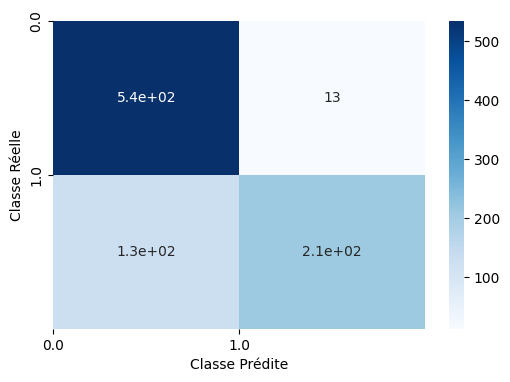

In [9]:
matrice_de_confusion(y_true, y_pred)

In [10]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.88       548
         1.0       0.94      0.62      0.75       339

    accuracy                           0.84       887
   macro avg       0.87      0.80      0.82       887
weighted avg       0.86      0.84      0.83       887



## 4-2 Adaboost classification

In [11]:
adaboost = AdaBoostClassifier()
trained_adaboost = GridSearchCV(adaboost,{'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]},cv=5,verbose=2)
trained_adaboost.fit(df.iloc[:,:-1],list(df.iloc[:,-1]))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.3s
[CV] END ................learning_rate=0.1, n_est

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [12]:
trained_adaboost.best_estimator_

AdaBoostClassifier(learning_rate=0.1)

In [13]:
y_pred = trained_adaboost.predict(df.iloc[:,:-1])
df_adaboost = df.copy()
df_adaboost['pred'] = y_pred
df_adaboost.head()

,Pclass,Sex,Age,Fare,Survived,pred
0,0.825209,0.735342,-0.589620,-0.500240,0.0,0.0
1,-1.572211,-1.359911,0.644848,0.788947,1.0,0.0
2,0.825209,-1.359911,-0.281003,-0.486650,1.0,0.0
3,-1.572211,-1.359911,0.413385,0.422861,1.0,0.0
4,0.825209,0.735342,0.413385,-0.484133,0.0,0.0


## 5-2-AdaboostClassifier classification Interprétation / Evaluation

In [14]:
y_true = df.iloc[:,-1]
confusion_matrix(y_true, y_pred)

array([[548,   0],
       [337,   2]], dtype=int64)

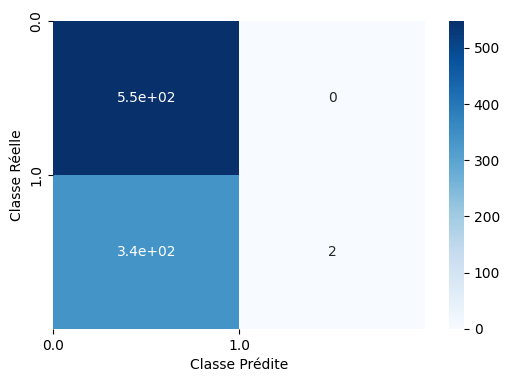

In [15]:
matrice_de_confusion(y_true, y_pred)

In [16]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76       548
         1.0       1.00      0.01      0.01       339

    accuracy                           0.62       887
   macro avg       0.81      0.50      0.39       887
weighted avg       0.76      0.62      0.48       887



## 4-3 SVC classification

In [17]:
svc = SVC()
trained_svc = GridSearchCV(svc,{    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'auto'],
    'kernel': ['linear', 'rbf']},cv=5,verbose=2)
trained_svc.fit(df.iloc[:,:-1],df.iloc[:,-1])

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, k

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [18]:
trained_svc.best_estimator_

SVC(C=0.1, gamma=0.1, kernel='linear')

In [19]:
y_pred = trained_svc.predict(df.iloc[:,:-1])
df_svc = df.copy()
df_svc['pred'] = y_pred
df_svc.head()

,Pclass,Sex,Age,Fare,Survived,pred
0,0.825209,0.735342,-0.589620,-0.500240,0.0,0.0
1,-1.572211,-1.359911,0.644848,0.788947,1.0,0.0
2,0.825209,-1.359911,-0.281003,-0.486650,1.0,0.0
3,-1.572211,-1.359911,0.413385,0.422861,1.0,0.0
4,0.825209,0.735342,0.413385,-0.484133,0.0,0.0


## 5-3-SVC classification Interprétation / Evaluation

In [20]:
y_true = df.iloc[:,-1]
confusion_matrix(y_true, y_pred)

array([[548,   0],
       [339,   0]], dtype=int64)

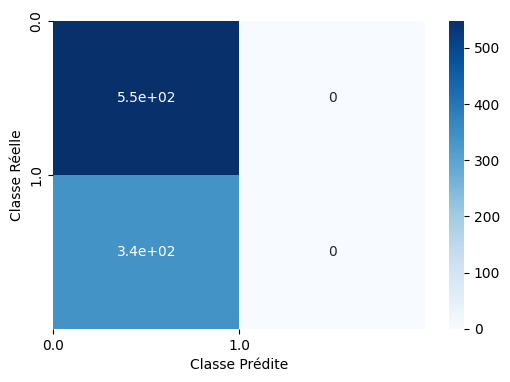

In [21]:
matrice_de_confusion(y_true, y_pred)

In [22]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76       548
         1.0       0.00      0.00      0.00       339

    accuracy                           0.62       887
   macro avg       0.31      0.50      0.38       887
weighted avg       0.38      0.62      0.47       887

